### ECC-p increasing 

In [1]:
source("./scale.R")
test <- read.csv("/data/sag_data.csv")
options(warn=-1)
library('latex2exp')

Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.2-9

Loading required package: spatstat.random

spatstat.random 3.2-3

Loading required package: spatstat.explore

Loading required package: nlme

spatstat.explore 3.2-7

Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.2-11

Loading required package: spatstat.linnet

spatstat.linnet 3.1-5


spatstat 3.0-8 
For an introduction to spatstat, type ‘beginner’ 



Attaching package: ‘dplyr’


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Read in dataset

In [2]:
data<- read.csv("/code/F2 - Hypothesis testing/temp/table-in.csv")
df<-data[,1:6]

In [4]:
types = df$Cluster[1:10]
sections<- apply(df[1:10,-1], 1, function(i) colnames(df[1:10,-1])[ !is.na(i) ]) ## qualified colns
sections<- unname(sapply(sections, function(x){as.numeric(gsub("X", "", x))}))

In [5]:
sups<-df$Cluster[11:18]
sections<- apply(df[11:18,-1], 1, function(i) colnames(df[11:18,-1])[ !is.na(i) ]) ## qualified colns
sups.sec<- unname(sapply(sections, function(x){as.numeric(gsub("X", "", x))}))
sups.sec

[[1]]
[1] 24

[[2]]
[1] 22

[[3]]
[1] 24 20

[[4]]
[1] 22

[[5]]
[1] 24 23 21 20

[[6]]
[1] 20

[[7]]
[1] 21 20

[[8]]
[1] 21

In [6]:
subs<-c('046 Vip Gaba','049 Lamp5 Gaba','052 Pvalb Gaba','053 Sst Gaba')
subs.sec<- list(c(24,20),c(22),c(24,23,21,20),c(21))

In [7]:
pps <-list()
for (t in 1:length(subs)){
    message(subs[t])
    ppw <-create_pp(test, 'FULL',subs.sec[[t]], subs[t])
    pps[[subs[t]]] = ppw
}

046 Vip Gaba

049 Lamp5 Gaba

052 Pvalb Gaba

053 Sst Gaba



In [8]:
ppt<-list()
for (t in 1:length(sups)){
    message(sups[t])
    ppw<-create_pp(test, NULL,sups.sec[[t]], sups[t])
    ppt[[sups[t]]] = ppw
}

0173 Vip Gaba_1

0177 Vip Gaba_5

0178 Vip Gaba_6

0199 Lamp5 Gaba_1

0207 Pvalb Gaba_3

0208 Pvalb Gaba_4

0212 Pvalb Gaba_8

0226 Sst Gaba_13



### Calculate ECC

In [12]:
entropy_terms <- function(x) {
  t <- table(x)
  freq <- t/sum(t)
  ifelse(freq==0, 0, -freq * log(freq, exp(1)))
}

In [15]:
## calculate ECC per section
calc_p<-function(typ,ss,df,lev){
    x <-unique(test[test$subclass %in% typ,]$subclass)
    y <-unique(test[test$supertype %in% typ,]$subclass)
    z <- unique(test[test$cluster %in% typ,]$subclass)
    cl<- Reduce(union, list(x, y, z))
    if (lev==1){
        d = list()
        for (s in ss){
            d[[length(d) +1]]<-as.data.frame(ppt[[typ]][[as.character(s)]])
            d1<-do.call("rbind", d)
            perc<-sum(entropy_terms(d1$marks))
        }
    }
    else if (lev==2){
        d = list()
        for (s in ss){
            d[[length(d) +1]]<-as.data.frame(pps[[typ]][[as.character(s)]])
            d1<-do.call("rbind", d)
            perc<-sum(entropy_terms(d1$marks))
        }
    }
    else{
        a<-typ
        perc<-0
    }
    res<- list()
    res[['Type']] = typ
    res[['perc']] = perc
    res[['level']] = lev
    res[['category']] = cl
    return(res)
}

### Illustration of ECS

In [2]:
library("spatstat")
set.seed(123)

In [3]:
pp1<-rStrauss(30,0.1,0.1,nsim=1)
pp2<-rStrauss(30,0.1,0.1,nsim=1)

In [4]:
pp3<-rHardcore(10,0.1,nsim=1)

In [7]:
pp<-superimpose("A"=pp1,"B"=pp2)

In [8]:
p<-superimpose("A"=pp1,"B"=pp3)

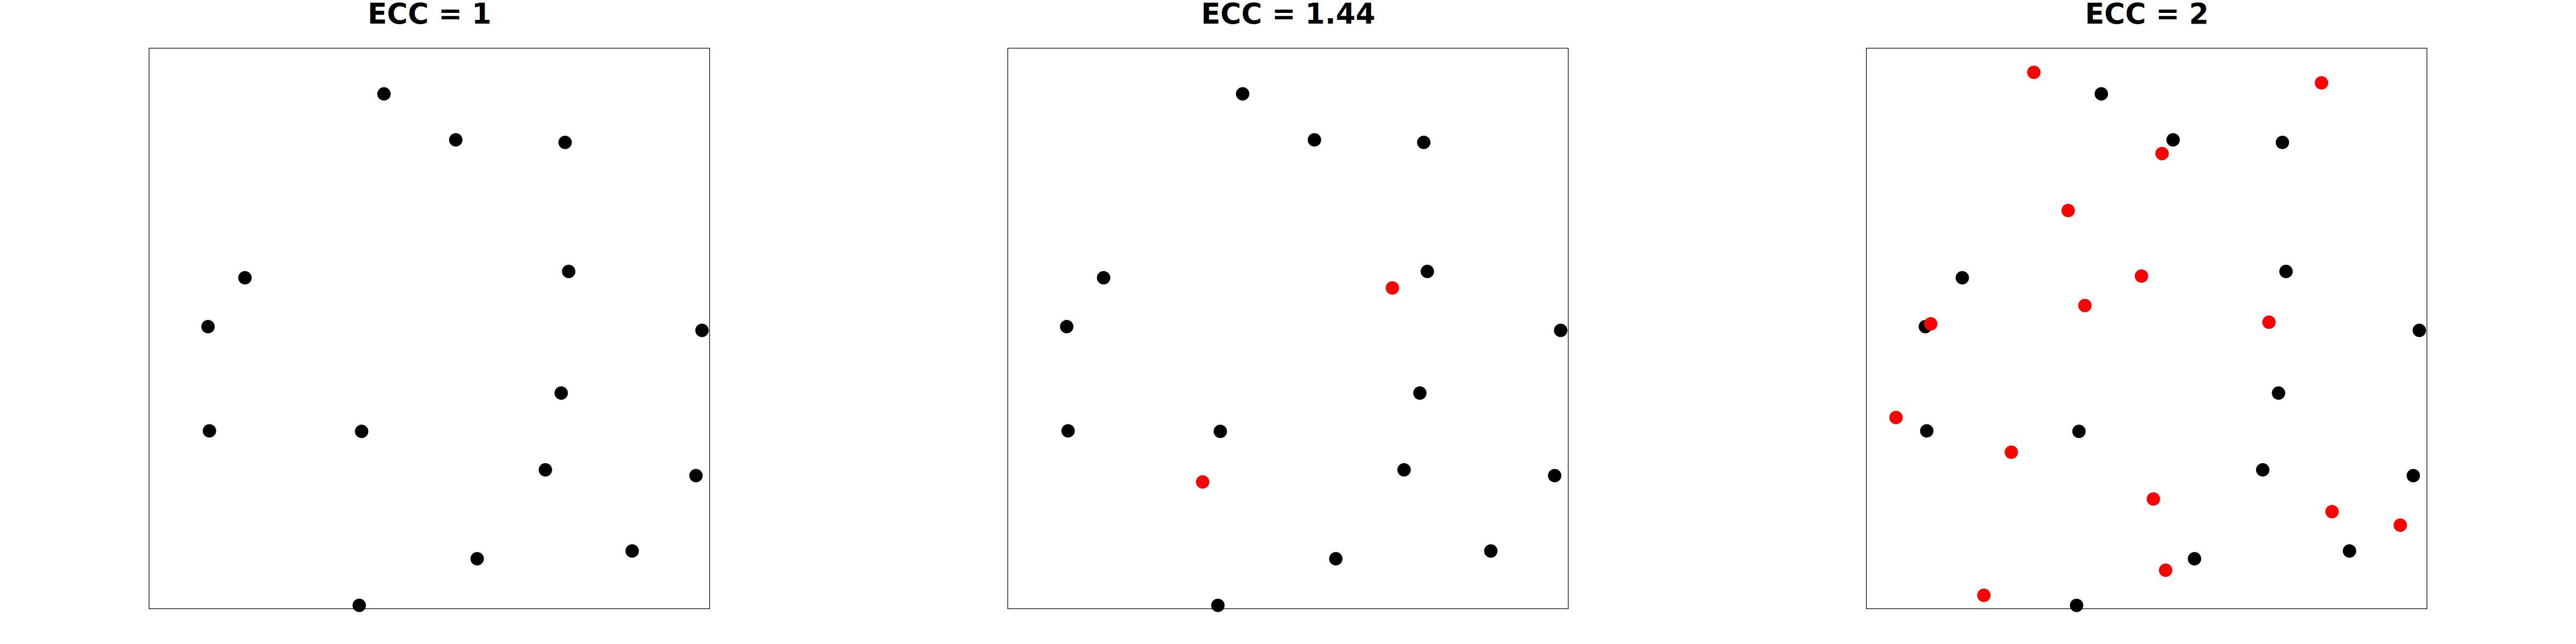

In [12]:
options(repr.plot.width=40, repr.plot.height=10)
op <- par(family = "sans")
cols <- c("black", "red")
par(cex.main=4,mfrow=c(1,3),mai=c(0.2,0.2,0.4,0.2))
plot(pp1,main=expression(bold(r'(ECC = 1)')),pch=20,cex=6,cex.main=10)
species_map_split <- split(p)
plot(species_map_split[[1]], main=expression(bold(r'(ECC = 1.44)')),cex=6,pch=20,
     cols = cols[1],cex.main=10)
for(i in 2:2){
  plot(species_map_split[[i]], cex=6,pch=20,
       add = TRUE, col = cols[i])
}
species_map_split <- split(pp)
plot(species_map_split[[1]], main=expression(bold(r'(ECC = 2)')),cex=6,pch=20,
     cols = cols[1],cex.main=10)
for(i in 2:2){
  plot(species_map_split[[i]], cex=6,pch=20,
       add = TRUE, col = cols[i])
}

par(op)

In [11]:
d1<-as.data.frame(pp)
exp(sum(entropy_terms(d1$marks)))

[1] 2

In [13]:
d1<-as.data.frame(p)
exp(sum(entropy_terms(d1$marks)))

[1] 1.436501

In [13]:
d1<-as.data.frame(pp1)
exp(sum(entropy_terms(d1$marks)))

[1] 1

### Increasing ECC over tree diagram
For each type and section, we calculate the information.  

In [16]:
df = data.frame(matrix(vector(), 0, 4,
                dimnames=list(c(), c('Type',"perc","level",'category'))),
                stringsAsFactors=F)
df$Type <- as.character(df$Type)
df$category <- as.character(df$category)
df

Type,perc,level,category
<chr>,<lgl>,<lgl>,<chr>


In [17]:
temp<-df
write.csv(df, "df.csv",row.names = FALSE)

In [18]:
for (t in 1:length(types)){
    message(types[t])
    # temp <-read.csv("df.csv")  ## temp table
    temp$Type <- as.character(temp$Type)
    q<-calc_p(types[t],sections[[t]],data,0)
    temp<-bind_rows(temp,as.data.frame(q))
    write.csv(temp, "df.csv",row.names = FALSE) 
}

0624 Vip Gaba_1

0641 Vip Gaba_5

0645 Vip Gaba_6

0709 Lamp5 Gaba_1

0740 Pvalb Gaba_3

0741 Pvalb Gaba_3

0742 Pvalb Gaba_3

0747 Pvalb Gaba_4

0754 Pvalb Gaba_8

0811 Sst Gaba_13



In [23]:
for (t in 1:length(sups)){
    message(sups[t])
    # temp <-read.csv("df.csv")  ## temp table
    temp$Type <- as.character(temp$Type)
    q<-calc_p(sups[t],sups.sec[[t]],data,1)
    temp<-bind_rows(temp,as.data.frame(q))
    write.csv(temp, "df.csv",row.names = FALSE)
}

0173 Vip Gaba_1

0177 Vip Gaba_5

0178 Vip Gaba_6

0199 Lamp5 Gaba_1

0207 Pvalb Gaba_3

0208 Pvalb Gaba_4

0212 Pvalb Gaba_8

0226 Sst Gaba_13



In [26]:
for (t in 1:length(subs)){
    message(subs[t])
    # temp <-read.csv("df.csv")  ## temp table
    temp$Type <- as.character(temp$Type)
    
    q<-calc_p(subs[t],subs.sec[[t]],data1,2)
    temp<-bind_rows(temp,as.data.frame(q))
    write.csv(temp, "df.csv",row.names = FALSE)
  
}

046 Vip Gaba

049 Lamp5 Gaba

052 Pvalb Gaba

053 Sst Gaba



In [30]:
temp$category<-as.numeric(as.factor(temp$category))

In [34]:
temp$ECS <- exp(temp$perc)
temp

Type,perc,level,category,ECS
<chr>,<dbl>,<int>,<dbl>,<dbl>
0624 Vip Gaba_1,0.0000000,0,1,1.000000
0641 Vip Gaba_5,0.0000000,0,1,1.000000
0645 Vip Gaba_6,0.0000000,0,1,1.000000
0709 Lamp5 Gaba_1,0.0000000,0,2,1.000000
0740 Pvalb Gaba_3,0.0000000,0,3,1.000000
0741 Pvalb Gaba_3,0.0000000,0,3,1.000000
0742 Pvalb Gaba_3,0.0000000,0,3,1.000000
0747 Pvalb Gaba_4,0.0000000,0,3,1.000000
0754 Pvalb Gaba_8,0.0000000,0,3,1.000000
